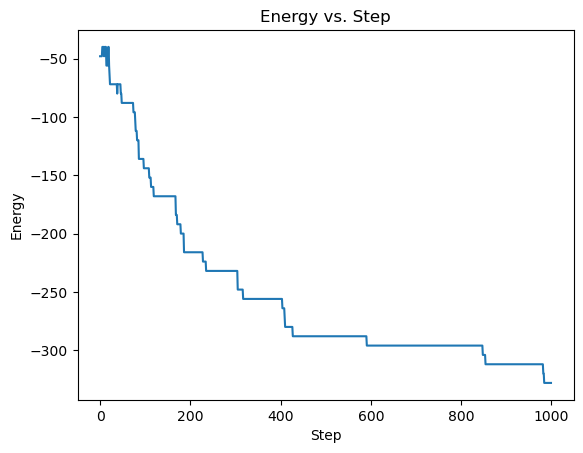

Number of 'up' spins: 85
Number of 'down' spins: 15


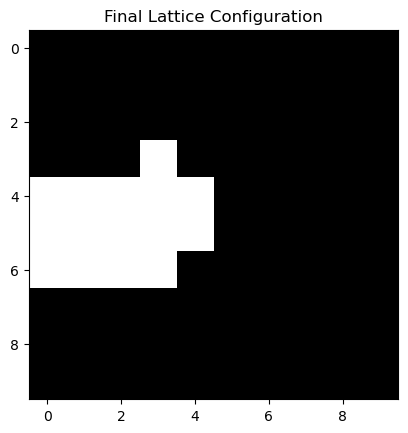

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 10  # Size of the lattice (N x N)
T_initial = 25.0  # Initial temperature
T_final = 0.1  # Final temperature
cooling_rate = 0.95  # Cooling rate
num_steps = 1000  # Number of Monte Carlo steps at each temperature

# Initialize the lattice with random spins (+1 or -1)
lattice = np.random.choice([-1, 1], size=(N, N))

# Define function to calculate energy
def calculate_energy(lattice):
    energy = 0
    for i in range(N):
        for j in range(N):
            spin = lattice[i, j]
            neighbors_sum = lattice[(i + 1) % N, j] + lattice[i, (j + 1) % N] + lattice[(i - 1) % N, j] + lattice[i, (j - 1) % N]
            energy += -spin * neighbors_sum
    return energy

# Simulated annealing algorithm
def simulated_annealing(lattice, T_initial, T_final, cooling_rate, num_steps):
    T = T_initial
    energy_history = []
    
    for step in range(num_steps):
        # Calculate energy of the current configuration
        energy_current = calculate_energy(lattice)
        
        # Choose a random spin to flip
        i, j = np.random.randint(0, N), np.random.randint(0, N)
        lattice[i, j] *= -1  # Flip the spin
        
        # Calculate energy after flip
        energy_new = calculate_energy(lattice)
        
        # Calculate energy difference
        delta_energy = energy_new - energy_current
        
        # Metropolis acceptance criterion
        if delta_energy <= 0 or np.random.rand() < np.exp(-delta_energy / T):
            energy_current = energy_new
        else:
            # Reject the flip and revert to previous state
            lattice[i, j] *= -1
        
        # Update temperature
        T *= cooling_rate
        
        # Append energy to history
        energy_history.append(energy_current)
    
    return lattice, energy_history

# Run simulated annealing
final_lattice, energy_history = simulated_annealing(lattice, T_initial, T_final, cooling_rate, num_steps)

# Plot energy history
plt.plot(energy_history)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Energy vs. Step')
plt.show()

# Count number of ups and downs
num_ups = np.sum(final_lattice == 1)
num_downs = np.sum(final_lattice == -1)

# Print the results
print("Number of 'up' spins:", num_ups)
print("Number of 'down' spins:", num_downs)

# Plot final lattice configuration
plt.imshow(final_lattice, cmap='binary', interpolation='nearest')
plt.title('Final Lattice Configuration')
plt.show()


Initial Number of 'up' spins: 51
Initial Number of 'down' spins: 49
Final Number of 'up' spins: 70
Final Number of 'down' spins: 30


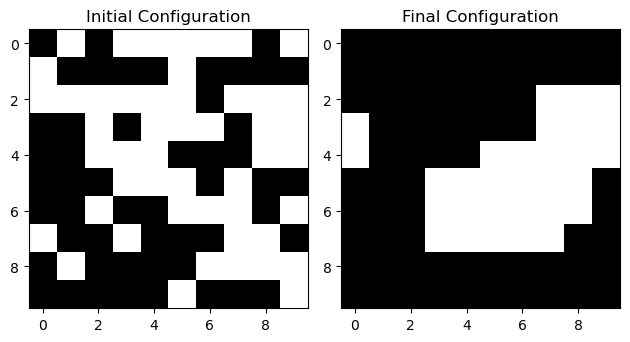

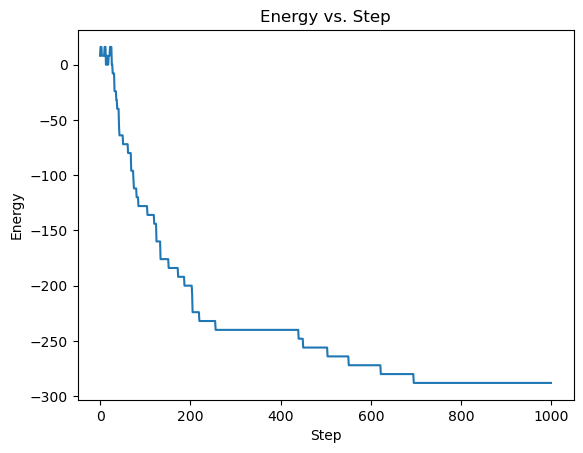

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 10  # Size of the lattice (N x N)
T_initial = 25.0  # Initial temperature
T_final = 0.1  # Final temperature
cooling_rate = 0.95  # Cooling rate
num_steps = 1000  # Number of Monte Carlo steps at each temperature

# Initialize the lattice with random spins (+1 or -1)
initial_lattice = np.random.choice([-1, 1], size=(N, N))

# Make a copy of the initial lattice
initial_copy = initial_lattice.copy()

# Define function to calculate energy
def calculate_energy(lattice):
    energy = 0
    for i in range(N):
        for j in range(N):
            spin = lattice[i, j]
            neighbors_sum = lattice[(i + 1) % N, j] + lattice[i, (j + 1) % N] + lattice[(i - 1) % N, j] + lattice[i, (j - 1) % N]
            energy += -spin * neighbors_sum
    return energy

# Simulated annealing algorithm
def simulated_annealing(initial_lattice, T_initial, T_final, cooling_rate, num_steps):
    lattice = initial_lattice.copy()  # Make a copy of the initial lattice
    T = T_initial
    energy_history = []
    
    for step in range(num_steps):
        # Calculate energy of the current configuration
        energy_current = calculate_energy(lattice)
        
        # Choose a random spin to flip
        i, j = np.random.randint(0, N), np.random.randint(0, N)
        lattice[i, j] *= -1  # Flip the spin
        
        # Calculate energy after flip
        energy_new = calculate_energy(lattice)
        
        # Calculate energy difference
        delta_energy = energy_new - energy_current
        
        # Metropolis acceptance criterion
        if delta_energy <= 0 or np.random.rand() < np.exp(-delta_energy / T):
            energy_current = energy_new
        else:
            # Reject the flip and revert to previous state
            lattice[i, j] *= -1
        
        # Update temperature
        T *= cooling_rate
        
        # Append energy to history
        energy_history.append(energy_current)
    
    return lattice, energy_history

# Run simulated annealing
final_lattice, energy_history = simulated_annealing(initial_lattice, T_initial, T_final, cooling_rate, num_steps)

# Count number of ups and downs in initial lattice
num_ups_initial = np.sum(initial_copy == 1)
num_downs_initial = np.sum(initial_copy == -1)

# Count number of ups and downs in final lattice
num_ups_final = np.sum(final_lattice == 1)
num_downs_final = np.sum(final_lattice == -1)

# Print initial and final counts
print("Initial Number of 'up' spins:", num_ups_initial)
print("Initial Number of 'down' spins:", num_downs_initial)
print("Final Number of 'up' spins:", num_ups_final)
print("Final Number of 'down' spins:", num_downs_final)

# Plot initial lattice configuration
plt.subplot(1, 2, 1)
plt.imshow(initial_copy, cmap='binary', interpolation='nearest')
plt.title('Initial Configuration')

# Plot final lattice configuration
plt.subplot(1, 2, 2)
plt.imshow(final_lattice, cmap='binary', interpolation='nearest')
plt.title('Final Configuration')

plt.tight_layout()
#plt.savefig('ising model normal_lattice.png')
plt.show()

# Plot energy over time
plt.plot(energy_history)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Energy vs. Step')
#plt.savefig('ising model normal_energy.png')
plt.show()


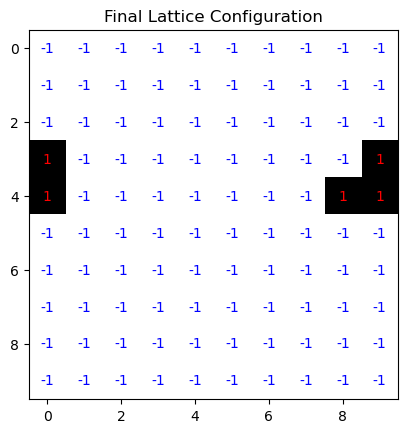

In [150]:
# Plot final lattice configuration with labels
plt.imshow(final_lattice, cmap='binary', interpolation='nearest')

# Add labels to indicate spin orientation
for i in range(N):
    for j in range(N):
        plt.text(j, i, str(final_lattice[i, j]), ha='center', va='center', color='red' if final_lattice[i, j] == 1 else 'blue')

plt.title('Final Lattice Configuration')
plt.show()


In [25]:
# Low temperatures

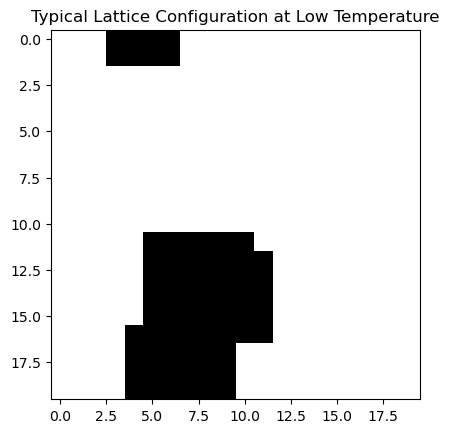

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 20  # Size of the lattice (N x N)
T = 0.1  # Low temperature
num_steps = 10000  # Number of Monte Carlo steps

# Initialize the lattice with random spins (+1 or -1)
lattice = np.random.choice([-1, 1], size=(N, N))

# Define function to calculate energy
def calculate_energy(lattice):
    energy = 0
    for i in range(N):
        for j in range(N):
            spin = lattice[i, j]
            neighbors_sum = lattice[(i + 1) % N, j] + lattice[i, (j + 1) % N] + lattice[(i - 1) % N, j] + lattice[i, (j - 1) % N]
            energy += -spin * neighbors_sum
    return energy / 2  # Divide by 2 to avoid double counting

# Metropolis algorithm
for step in range(num_steps):
    # Choose a random spin to flip
    i, j = np.random.randint(0, N), np.random.randint(0, N)
    old_spin = lattice[i, j]
    new_spin = -old_spin
    
    # Calculate energy change
    dE = 2 * old_spin * (lattice[(i + 1) % N, j] + lattice[i, (j + 1) % N] + lattice[(i - 1) % N, j] + lattice[i, (j - 1) % N])
    
    # Metropolis acceptance criterion
    if dE <= 0 or np.random.rand() < np.exp(-dE / T):
        lattice[i, j] = new_spin

# Plot final lattice configuration
plt.imshow(lattice, cmap='binary', interpolation='nearest')
plt.title('Typical Lattice Configuration at Low Temperature')
plt.show()


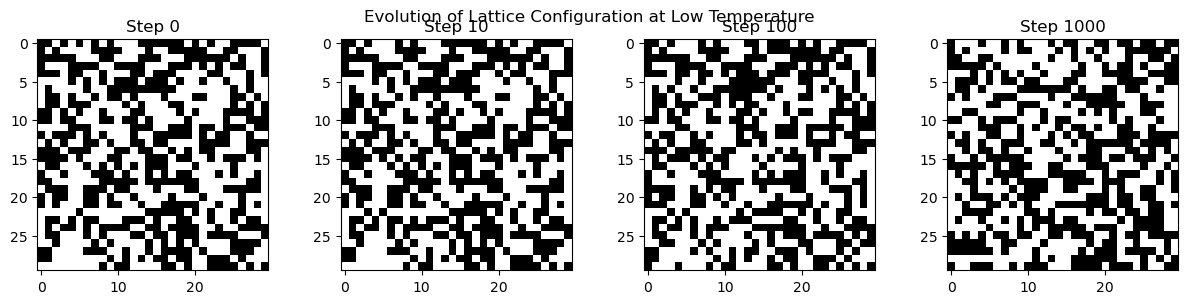

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 30  # Size of the lattice (N x N)
T = 0.1  # Low temperature
num_steps = 10000  # Number of Monte Carlo steps
snapshots = [0, 10, 100, 1000, num_steps]  # Time points for snapshots

# Initialize the lattice with random spins (+1 or -1)
lattice = np.random.choice([-1, 1], size=(N, N))

# Define function to calculate energy (same as before)

# List to store snapshots of lattice configurations
snapshot_lattices = []

# Metropolis algorithm
for step in range(num_steps):
    # Choose a random spin to flip
    i, j = np.random.randint(0, N), np.random.randint(0, N)
    old_spin = lattice[i, j]
    new_spin = -old_spin
    
    # Calculate energy change (same as before)
    
    # Metropolis acceptance criterion (same as before)
    
    # Check if current step is a snapshot point
    if step in snapshots:
        snapshot_lattices.append(np.copy(lattice))  # Make a copy of the lattice

    # Flip the spin
    lattice[i, j] = new_spin

# Plot snapshots of lattice configurations
fig, axes = plt.subplots(1, len(snapshot_lattices), figsize=(15, 3))

for i, snapshot in enumerate(snapshot_lattices):
    axes[i].imshow(snapshot, cmap='binary', interpolation='nearest')
    axes[i].set_title(f'Step {snapshots[i]}')

plt.suptitle('Evolution of Lattice Configuration at Low Temperature')
plt.savefig('low temp ising model')
plt.show()
